In [155]:
utf8::utf8_print('\U0001f6a7 work in progress \U0001f6a7')

[1] "🚧​ work in progress 🚧​"


# click_annotvcf annotations analysis

Created: **27/08/18**  
Last modified: **27/08/18**

**Goal:** This notebook studies the annotations added with click_annotvcf, see [/data/annotate_with_click_annotvcf](https://github.com/ElsaB/impact-annotator/tree/master/data/annotate_with_click_annotvcf).  
This notebook is divided in !! parts:
* **1. Get click_annotvcf annotations**:  
* **2. IMPACT annotations vs VAGrENT annotations vs VEP annotations**:
* **4. Other VEP annotations**

**Refs:**
* [data/annotate_with_click_annotvcf](
https://github.com/ElsaB/impact-annotator/tree/master/data/annotate_with_click_annotvcf)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-click_annotvcf-annotations" data-toc-modified-id="Get-click_annotvcf-annotations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get click_annotvcf annotations</a></span><ul class="toc-item"><li><span><a href="#Get-the-raw-data" data-toc-modified-id="Get-the-raw-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get the raw data</a></span></li><li><span><a href="#Create-keys-to-join-the-two-dataframes-and-extract-the-features" data-toc-modified-id="Create-keys-to-join-the-two-dataframes-and-extract-the-features-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Create keys to join the two dataframes and extract the features</a></span></li><li><span><a href="#Deal-with-NA-values" data-toc-modified-id="Deal-with-NA-values-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Deal with <code>NA</code> values</a></span></li><li><span><a href="#Process-raw-features" data-toc-modified-id="Process-raw-features-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Process raw features</a></span></li></ul></li><li><span><a href="#IMPACT-annotations-vs-VAGrENT-annotations-vs-VEP-annotations" data-toc-modified-id="IMPACT-annotations-vs-VAGrENT-annotations-vs-VEP-annotations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>IMPACT annotations vs VAGrENT annotations vs VEP annotations</a></span><ul class="toc-item"><li><span><a href="#Variant_Type-vs-VAG_VT-vs-VEP_VARIANT_CLASS" data-toc-modified-id="Variant_Type-vs-VAG_VT-vs-VEP_VARIANT_CLASS-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><code>Variant_Type</code> vs <code>VAG_VT</code> vs <code>VEP_VARIANT_CLASS</code></a></span></li><li><span><a href="#Consequence-vs-VAG_EFFECT-vs-VEP_Consequence" data-toc-modified-id="Consequence-vs-VAG_EFFECT-vs-VEP_Consequence-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><code>Consequence</code> vs <code>VAG_EFFECT</code> vs <code>VEP_Consequence</code></a></span></li><li><span><a href="#Hugo_Symbol-vs-VAG_GENE-vs-VEP_SYMBOL" data-toc-modified-id="Hugo_Symbol-vs-VAG_GENE-vs-VEP_SYMBOL-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><code>Hugo_Symbol</code> vs <code>VAG_GENE</code> vs <code>VEP_SYMBOL</code></a></span></li><li><span><a href="#cDNA_change,-VAG_cDNA_CHANGE,-VEP_HGVSc" data-toc-modified-id="cDNA_change,-VAG_cDNA_CHANGE,-VEP_HGVSc-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span><code>cDNA_change</code>, <code>VAG_cDNA_CHANGE</code>, <code>VEP_HGVSc</code></a></span></li><li><span><a href="#HGVSp_Short,-VAG_PROTEIN_CHANGE,-VEP_HGVSp" data-toc-modified-id="HGVSp_Short,-VAG_PROTEIN_CHANGE,-VEP_HGVSp-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><code>HGVSp_Short</code>, <code>VAG_PROTEIN_CHANGE</code>, <code>VEP_HGVSp</code></a></span></li><li><span><a href="#VAG_RNA_CHANGE" data-toc-modified-id="VAG_RNA_CHANGE-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span><code>VAG_RNA_CHANGE</code></a></span></li></ul></li><li><span><a href="#Other-VEP-annotations" data-toc-modified-id="Other-VEP-annotations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Other VEP annotations</a></span><ul class="toc-item"><li><span><a href="#VEP_BIOTYPE" data-toc-modified-id="VEP_BIOTYPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><code>VEP_BIOTYPE</code></a></span></li><li><span><a href="#VEP-gnomAD-annotations" data-toc-modified-id="VEP-gnomAD-annotations-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>VEP gnomAD annotations</a></span></li><li><span><a href="#VEP-COSMIC-annotations" data-toc-modified-id="VEP-COSMIC-annotations-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>VEP COSMIC annotations</a></span></li><li><span><a href="#VEP-SIFT-and-PolyPhen-annotations" data-toc-modified-id="VEP-SIFT-and-PolyPhen-annotations-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>VEP SIFT and PolyPhen annotations</a></span></li></ul></li></ul></div>

In [156]:
source("../../../src/utils/custom_tools.R")
setup_environment("../../../src/utils")

In [157]:
impact <- read.table("../../../data/cleaned_IMPACT_mutations_180508.txt", sep = "\t", stringsAsFactors = FALSE, header = TRUE)
impact <- add_features("../../../data/", impact, annotations = TRUE)

## Get click_annotvcf annotations

Get the features from `click_annotvcf_IMPACT_mutations_180508.txt` (impact annotated by the click_annotvcf pipeline).

### Get the raw data

In [158]:
impact_annotated <- read.table("../../../data/annotate_with_click_annotvcf/click_annotvcf_IMPACT_mutations_180508.txt",
                   sep = "\t", stringsAsFactors = FALSE, header = TRUE, comment = "#")

In [159]:
ncol(impact_annotated)
nrow(impact_annotated)
head(impact_annotated)

[1] 157

[1] 588547

ID_VARIANT    TARGET_NAME REFERENCE_NAME CHR START   END     REF ALT
1 1_2487766_T_C NA          NA             1   2487766 2487766 T   C  
2 1_2487766_T_C NA          NA             1   2487766 2487766 T   C  
3 1_2487954_G_A NA          NA             1   2487954 2487954 G   A  
4 1_2487984_C_A NA          NA             1   2487984 2487984 C   A  
5 1_2487998_C_G NA          NA             1   2487998 2487998 C   G  
6 1_2487998_C_T NA          NA             1   2487998 2487998 C   T  
  CONTEXT_5 CHANGE CONTEXT_3 QUAL CALLED_BY PASSED_BY NUMBER_OF_CALLERS
1 TGGAA     C      GGTGC     NA   NA        NA        0                
2 TGGAA     C      GGTGC     NA   NA        NA        0                
3 GCTCG     A      GTTCT     NA   NA        NA        0                
4 CGAGG     A      GGATT     NA   NA        NA        0                
5 TTTCT     G      TTTCT     NA   NA        NA        0                
6 TTTCT     T      TTTCT     NA   NA        NA        0                
  FLAGS_ALL TARGET_VAF_MEAN TARGET_VAF_STD REFERENCE_VAF_MEAN REFERENCE_VAF_STD
1 PASS      NA              NA             NA                 NA               
2 PASS      NA              NA             NA                 NA               
3 PASS      NA              NA             NA                 NA               
4 PASS      NA              NA             NA                 NA               
5 PASS      NA              NA             NA                 NA               
6 PASS      NA              NA             NA                 NA               
  mutect_TARGET_VAF mutect_TARGET_DEPTH mutect_REFERENCE_VAF
1 NA                NA                  NA                  
2 NA                NA                  NA                  
3 NA                NA                  NA                  
4 NA                NA                  NA                  
5 NA                NA                  NA                  
6 NA                NA                  NA                  
  mutect_REFERENCE_DEPTH mutect_DIRPROP mutect_READS_FORWARD
1 NA                     NA             NA                  
2 NA                     NA             NA                  
3 NA                     NA             NA                  
4 NA                     NA             NA                  
5 NA                     NA             NA                  
6 NA                     NA             NA                  
  mutect_READS_REVERSE strelka_TARGET_VAF strelka_TARGET_DEPTH
1 NA                   NA                 NA                  
2 NA                   NA                 NA                  
3 NA                   NA                 NA                  
4 NA                   NA                 NA                  
5 NA                   NA                 NA                  
6 NA                   NA                 NA                  
  strelka_REFERENCE_VAF strelka_REFERENCE_DEPTH caveman_TARGET_VAF
1 NA                    NA                      NA                
2 NA                    NA                      NA                
3 NA                    NA                      NA                
4 NA                    NA                      NA                
5 NA                    NA                      NA                
6 NA                    NA                      NA                
  caveman_TARGET_DEPTH caveman_REFERENCE_VAF caveman_REFERENCE_DEPTH
1 NA                   NA                    NA                     
2 NA                   NA                    NA                     
3 NA                   NA                    NA                     
4 NA                   NA                    NA                     
5 NA                   NA                    NA                     
6 NA                   NA                    NA                     
  caveman_DIRPROP caveman_READS_FORWARD caveman_READS_REVERSE CAVEMAN_DS
1 NA              NA                    NA                    NA        
2 NA              NA                    NA      

In [160]:
id_colnames  <- c("ID_VARIANT", "CHR", "START", "END", "REF", "ALT")
vag_colnames <- c("VAG_VT", "VAG_GENE", "VAG_RNA_CHANGE", "VAG_cDNA_CHANGE", "VAG_PROTEIN_CHANGE", "VAG_EFFECT")
vep_colnames <- c("VEP_Consequence", "VEP_BIOTYPE", "VEP_SYMBOL", "VEP_EXON", "VEP_INTRON", "VEP_HGVSc",
                  "VEP_HGVSp", "VEP_Amino_acids", "VEP_VARIANT_CLASS", "VEP_SIFT", "VEP_PolyPhen")
    
vep_gnomad_colnames <- c("VEP_gnomAD_AF", "VEP_MAX_AF", "VEP_MAX_AF_POPS")
vep_cosmic_colnames <- c("VEP_COSMIC", "VEP_COSMIC_CDS", "VEP_COSMIC_AA", "VEP_COSMIC_CNT")

colnames_to_keep <- c(id_colnames, vag_colnames, vep_colnames, vep_gnomad_colnames, vep_cosmic_colnames)

impact_annotated <- impact_annotated[, colnames_to_keep]

### Create keys to join the two dataframes and extract the features

We are going to identify each mutation with a key in both dataframes, allowing us to link each mutation from `impact` to its corresponding mutation in `impact_annotated`. The keys will be: 
* `mut_key` for `impact`
* `CHR`\_`START`\_`REF`_`ALT` for `impact_annotated`, however because the file was annotated from `impact` converted to `.vcf` format, there's a correction to be made for `INS` and `DEL` (ex: for insertions the syntax is `-/A` for `impact` vs `T/TA` for `impact_annotated`).

In [161]:
get_join_key <- function(data) {
        
    if (substr(data["REF"], 1, 1) == substr(data["ALT"], 1, 1) &
        (nchar(data["REF"]) == 1 | nchar(data["ALT"]) == 1)) {
        
        data["REF"] = substr(data["REF"], 2, nchar(data["REF"]))
        data["ALT"] = substr(data["ALT"], 2, nchar(data["ALT"]))
        
        if (nchar(data["REF"]) == 0)
            data["REF"] = '-'
        else
            data["ALT"] = '-'
    }

    return (gsub(' ', '', (paste(data["CHR"], data["START"], data["REF"], data["ALT"], sep = "_"))))
}


# head(apply(impact_annotated[1:9000,], 1, get_join_key))
impact_annotated$join_key <- apply(impact_annotated, 1, get_join_key)
head(impact_annotated$join_key)

[1] "1_2487766_T_C" "1_2487766_T_C" "1_2487954_G_A" "1_2487984_C_A"
[5] "1_2487998_C_G" "1_2487998_C_T"

**Verification 1** Make sure every impact `mut_key` has an analoguous `join_key` in `impact_annotated`:

Somehow some deletions and insertion don't have the same format, but have the original `impact_annotated` format, for these mutations we will use `ID_VARIANT` as a `join_key`.

In [162]:
unmatched <- impact[! impact$mut_key %in% impact_annotated$join_key,] 

table(unmatched$Variant_Type)
head(unmatched[order(unmatched$Hugo_Symbol),])

table(unmatched$mut_key %in% impact_annotated$ID_VARIANT)


DEL INS 
 78   9 

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,cDNA_change,HGVSp_Short,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,confidence_class,sample_coverage,mut_key,sample_mut_key,frequency_in_normals,Kaviar_AF,cosmic_count
213563,APC,5,112175611,112175612,frameshift_deletion,DEL,AC,A,P-0025157-T01-IM6,c.4319_4321delinsAA,p.P1440Qfs*33,367,0.26431,97,364,0.00275,1,175,186,44,53,UNLIKELY,704,5_112175611_AC_A,P-0025157-T01-IM6_5_112175611_AC_A,0,0,0
51669,ARID1A,1,27107224,27107225,frameshift_insertion,INS,T,TA,P-0006734-T01-IM5,c.6835_6836delinsGTA,p.L2279fs,695,0.40288,280,345,0.00000,0,215,199,132,148,MANUAL_OK,873,1_27107224_T_TA,P-0006734-T01-IM5_1_27107224_T_TA,0,0,0
68891,ARID1A,1,27106470,27106480,frameshift_deletion,DEL,ACCACTAACTT,A,P-0009005-T01-IM5,c.6080_8091delinsAA,p.A2027fs,670,0.37910,254,383,0.00261,1,231,185,141,113,AUTO_OK,1098,1_27106470_ACCACTAACTT_A,P-0009005-T01-IM5_1_27106470_ACCACTAACTT_A,0,0,0
112201,ARID1A,1,27101522,27101523,frameshift_deletion,DEL,AG,A,P-0014308-T01-IM6,c.4803_4805delinsAA,p.S1602Tfs*10,968,0.35537,344,952,0.00105,1,493,474,167,177,AUTO_OK,989,1_27101522_AG_A,P-0014308-T01-IM6_1_27101522_AG_A,0,0,0
230700,ARID1A,1,27106597,27106607,frameshift_deletion,DEL,CAGTTGGACCT,C,P-0027143-T01-IM6,c.6207_6218delinsAC,p.Q2070Hfs*62,867,0.22261,193,599,0.00501,3,315,361,94,99,AUTO_OK,790,1_27106597_CAGTTGGACCT_C,P-0027143-T01-IM6_1_27106597_CAGTTGGACCT_C,0,0,0
178730,ARID1B,6,157505405,157505406,frameshift_deletion,DEL,TA,T,P-0021290-T01-IM6,c.3385_3387delinsTT,p.N1130Tfs*12,554,0.32310,179,557,0.00180,1,276,278,91,88,AUTO_OK,627,6_157505405_TA_T,P-0021290-T01-IM6_6_157505405_TA_T,0,0,0



TRUE 
  87 

In [163]:
is_unmatched <- which(impact_annotated$ID_VARIANT %in% unmatched$mut_key)
impact_annotated$join_key[is_unmatched] <- impact_annotated$ID_VARIANT[is_unmatched]

**Verification 2** The features are unique for each `join_key`:

In [164]:
impact_annotated <- unique(impact_annotated)

In [165]:
nrow(impact_annotated %>% group_by(join_key) %>% filter(n() > 1))

[1] 0

In [166]:
colnames_to_keep <- c(vag_colnames, vep_colnames, vep_gnomad_colnames, vep_cosmic_colnames)

In [167]:
impact[, colnames_to_keep] <- left_join(impact, impact_annotated,
                                        by = c("mut_key" = "join_key"))[, c(vag_colnames,
                                                                            vep_colnames,
                                                                            vep_gnomad_colnames,
                                                                            vep_cosmic_colnames)]

In [168]:
head(impact)

Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,cDNA_change,HGVSp_Short,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,confidence_class,sample_coverage,mut_key,sample_mut_key,frequency_in_normals,Kaviar_AF,cosmic_count,VAG_VT,VAG_GENE,VAG_RNA_CHANGE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_BIOTYPE,VEP_SYMBOL,VEP_EXON,VEP_INTRON,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_SIFT,VEP_PolyPhen,VEP_gnomAD_AF,VEP_MAX_AF,VEP_MAX_AF_POPS,VEP_COSMIC,VEP_COSMIC_CDS,VEP_COSMIC_AA,VEP_COSMIC_CNT
TP53,17,7577515,7577515,nonsynonymous_SNV,SNP,T,G,P-0000012-T02-IM3,c.766A>C,p.T256P,227,0.50220,114,569,0.00000,0,59,54,58,56,AUTO_OK,344,17_7577515_T_G,P-0000012-T02-IM3_17_7577515_T_G,0,0.0e+00,1,Sub,TP53,r.956a>c,c.766A>C,p.T256P,non_synonymous_codon,missense_variant,protein_coding,TP53,7|11,NA,ENST00000269305.4:c.766A>C,ENSP00000269305.4:p.Thr256Pro,T/P,SNV,deleterious(0),probably_damaging(0.999),NA,NA,NA,COSM45830,c.766A>C,p.T256P,1
ARID1A,1,27101572,27101572,synonymous_SNV,SNP,C,G,P-0000012-T02-IM3,c.4854C>G,p.P1618P,281,0.07829,22,879,0.00000,0,126,129,11,11,UNKNOWN,344,1_27101572_C_G,P-0000012-T02-IM3_1_27101572_C_G,0,0.0e+00,0,Sub,ARID1A,r.5225c>g,c.4854C>G,p.P1618P,synonymous_codon,synonymous_variant,protein_coding,ARID1A,18|20,NA,ENST00000324856.7:c.4854C>G,ENSP00000320485.7:p.Pro1618%3D,P,SNV,NA,NA,NA,NA,NA,NA,NA,NA,NA
PTPRS,19,5244030,5244030,synonymous_SNV,SNP,C,G,P-0000012-T02-IM3,c.1452G>C,p.L484L,299,0.37793,113,730,0.00274,2,97,87,61,52,UNKNOWN,344,19_5244030_C_G,P-0000012-T02-IM3_19_5244030_C_G,0,0.0e+00,0,Sub,PTPRS,r.1686g>c,c.1452G>C,p.L484L,synonymous_codon,synonymous_variant,protein_coding,PTPRS,11|38,NA,ENST00000357368.4:c.1452G>C,ENSP00000349932.4:p.Leu484%3D,L,SNV,NA,NA,NA,NA,NA,NA,NA,NA,NA
PIK3R3,1,46521514,46521514,nonsynonymous_SNV,SNP,G,C,P-0000012-T03-IM3,c.894C>G,p.I298M,733,0.17599,129,1243,0.00000,0,288,316,61,68,AUTO_OK,428,1_46521514_G_C,P-0000012-T03-IM3_1_46521514_G_C,0,0.0e+00,0,Sub,PIK3R3,r.1049c>g,c.1032C>G,p.I344M,non_synonymous_codon,missense_variant,protein_coding,PIK3R3,7|10,NA,ENST00000262741.5:c.894C>G,ENSP00000262741.5:p.Ile298Met,I/M,SNV,deleterious(0),benign(0.277),NA,NA,NA,NA,NA,NA,NA
ATR,3,142178126,142178126,nonsynonymous_SNV,SNP,C,A,P-0000012-T03-IM3,c.7292G>T,p.R2431M,482,0.17427,84,581,0.00172,1,221,177,46,38,AUTO_OK,428,3_142178126_C_A,P-0000012-T03-IM3_3_142178126_C_A,0,6.5e-06,0,Sub,ATR,r.7414g>u,c.7292G>T,p.R2431M,non_synonymous_codon,missense_variant,protein_coding,ATR,43|47,NA,ENST00000350721.4:c.7292G>T,ENSP00000343741.4:p.Arg2431Met,R/M,SNV,deleterious(0),probably_damaging(0.997),4.063e-06,8.96e-06,gnomAD_NFE,NA,NA,NA,NA
PDGFRA,4,55139732,55139732,nonsynonymous_SNV,SNP,T,A,P-0000012-T03-IM3,c.1393T>A,p.L465M,570,0.20351,116,811,0.00000,0,252,202,66,50,AUTO_OK,428,4_55139732_T_A,P-0000012-T03-IM3_4_55139732_T_A,0,0.0e+00,0,Sub,PDGFRA,r.1724u>a,c.1393T>A,p.L465M,non_synonymous_codon,missense_variant,protein_coding,PDGFRA,10|23,NA,ENST00000257290.5:c.1393T>A,ENSP00000257290.5:p.Leu465Met,L/M,SNV,deleterious(0.01),probably_damaging(0.965),NA,NA,NA,NA,NA,NA,NA


In [221]:
impact2 <- impact

### Deal with `NA` values

In [169]:
count_na <- function(data) {
    return (sum(is.na(data)))
}

In [170]:
get_na <- function(data, feature_name) {
    return (data[is.na(data[,feature_name]),])
}

In [171]:
replace_na <- function(data, feature_name, replace_value){
    data[is.na(data[,feature_name]), feature_name] <- replace_value
    
    return (data)
}

#### VAGrENT

In [172]:
vag_colnames

[1] "VAG_VT"             "VAG_GENE"           "VAG_RNA_CHANGE"    
[4] "VAG_cDNA_CHANGE"    "VAG_PROTEIN_CHANGE" "VAG_EFFECT"

In [173]:
count_na(impact$VAG_VT)

[1] 0

7415 mutations unknown by VAGrENT, most of them are deletions:

In [174]:
count_na(impact$VAG_GENE)
count_na(impact$VAG_EFFECT)
count_na(impact$VAG_RNA_CHANGE)

nrow(impact[is.na(impact$VAG_GENE) & is.na(impact$VAG_EFFECT) & is.na(impact$VAG_RNA_CHANGE),])

[1] 7415

[1] 7415

[1] 7415

[1] 7415

[1] "Number of different genes:  379"


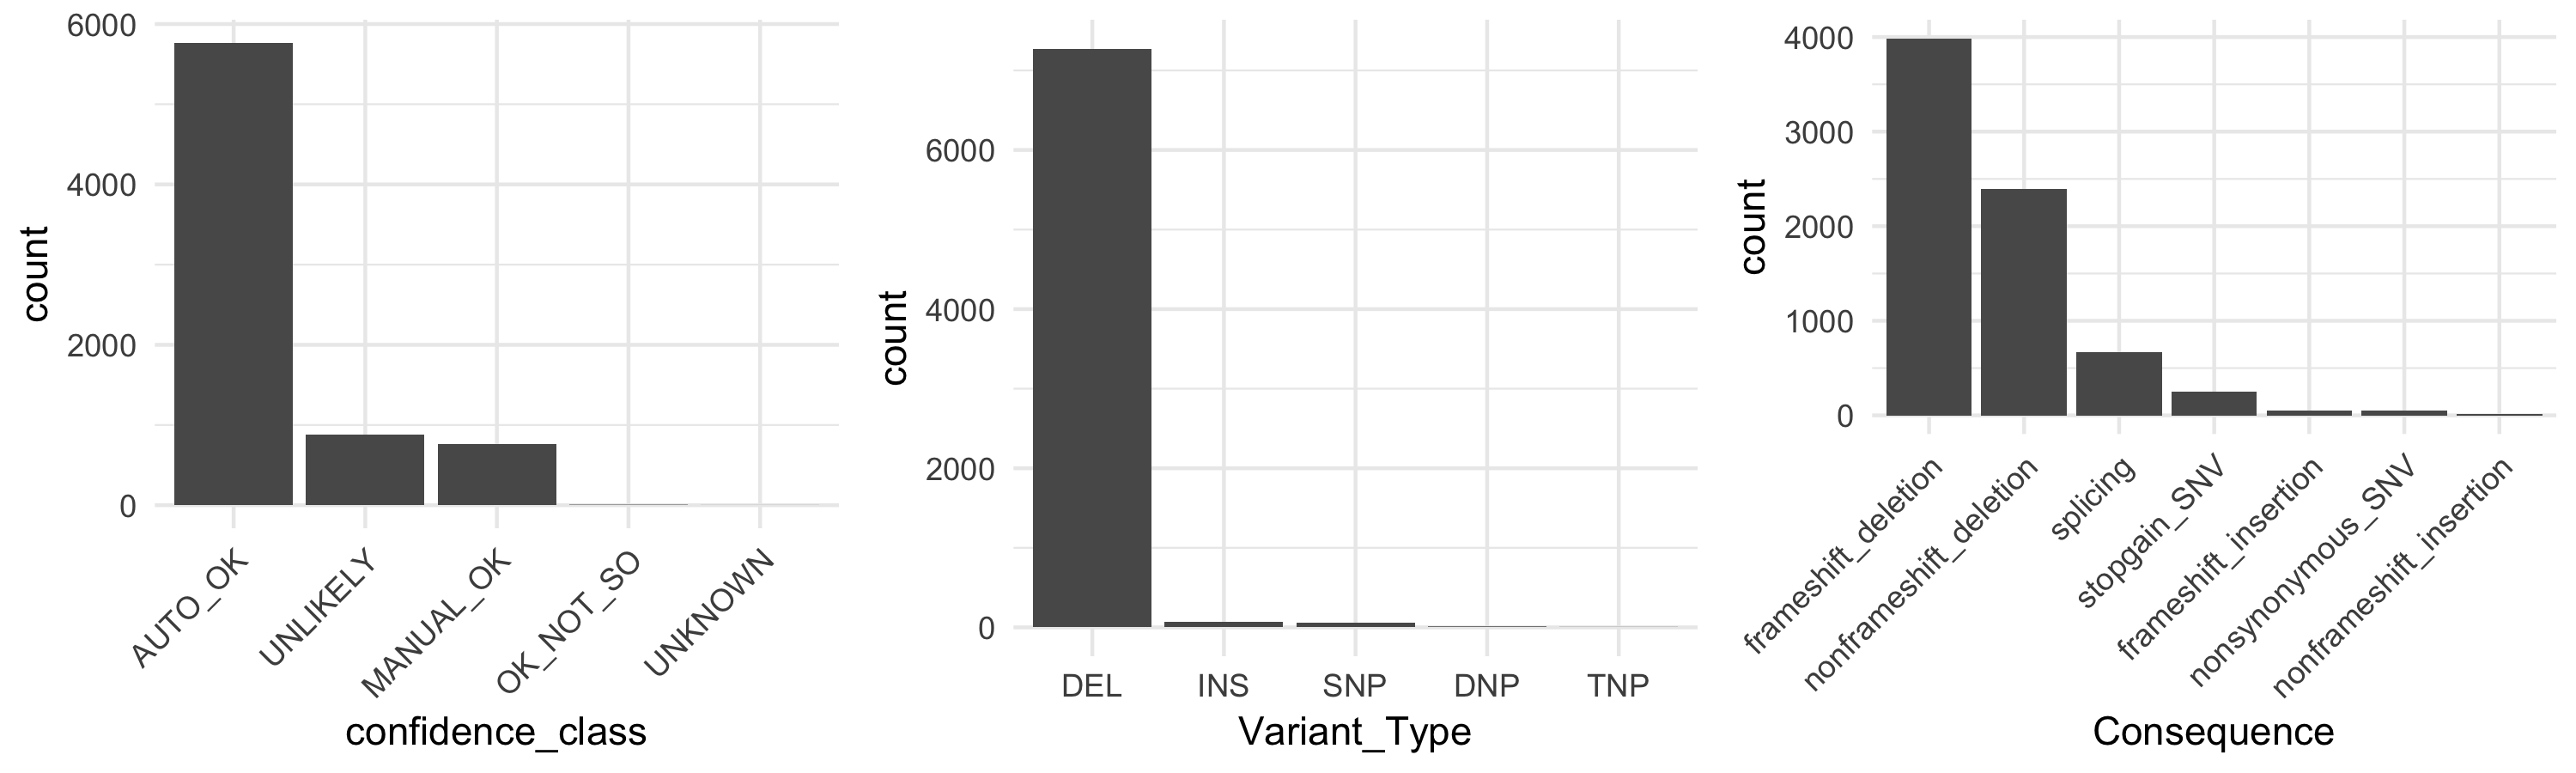

In [175]:
get_possible_correlations(get_na(impact, "VAG_GENE"))

[1] 12118

[1] 12118

[1] 12118

[1] "Number of different genes:  440"


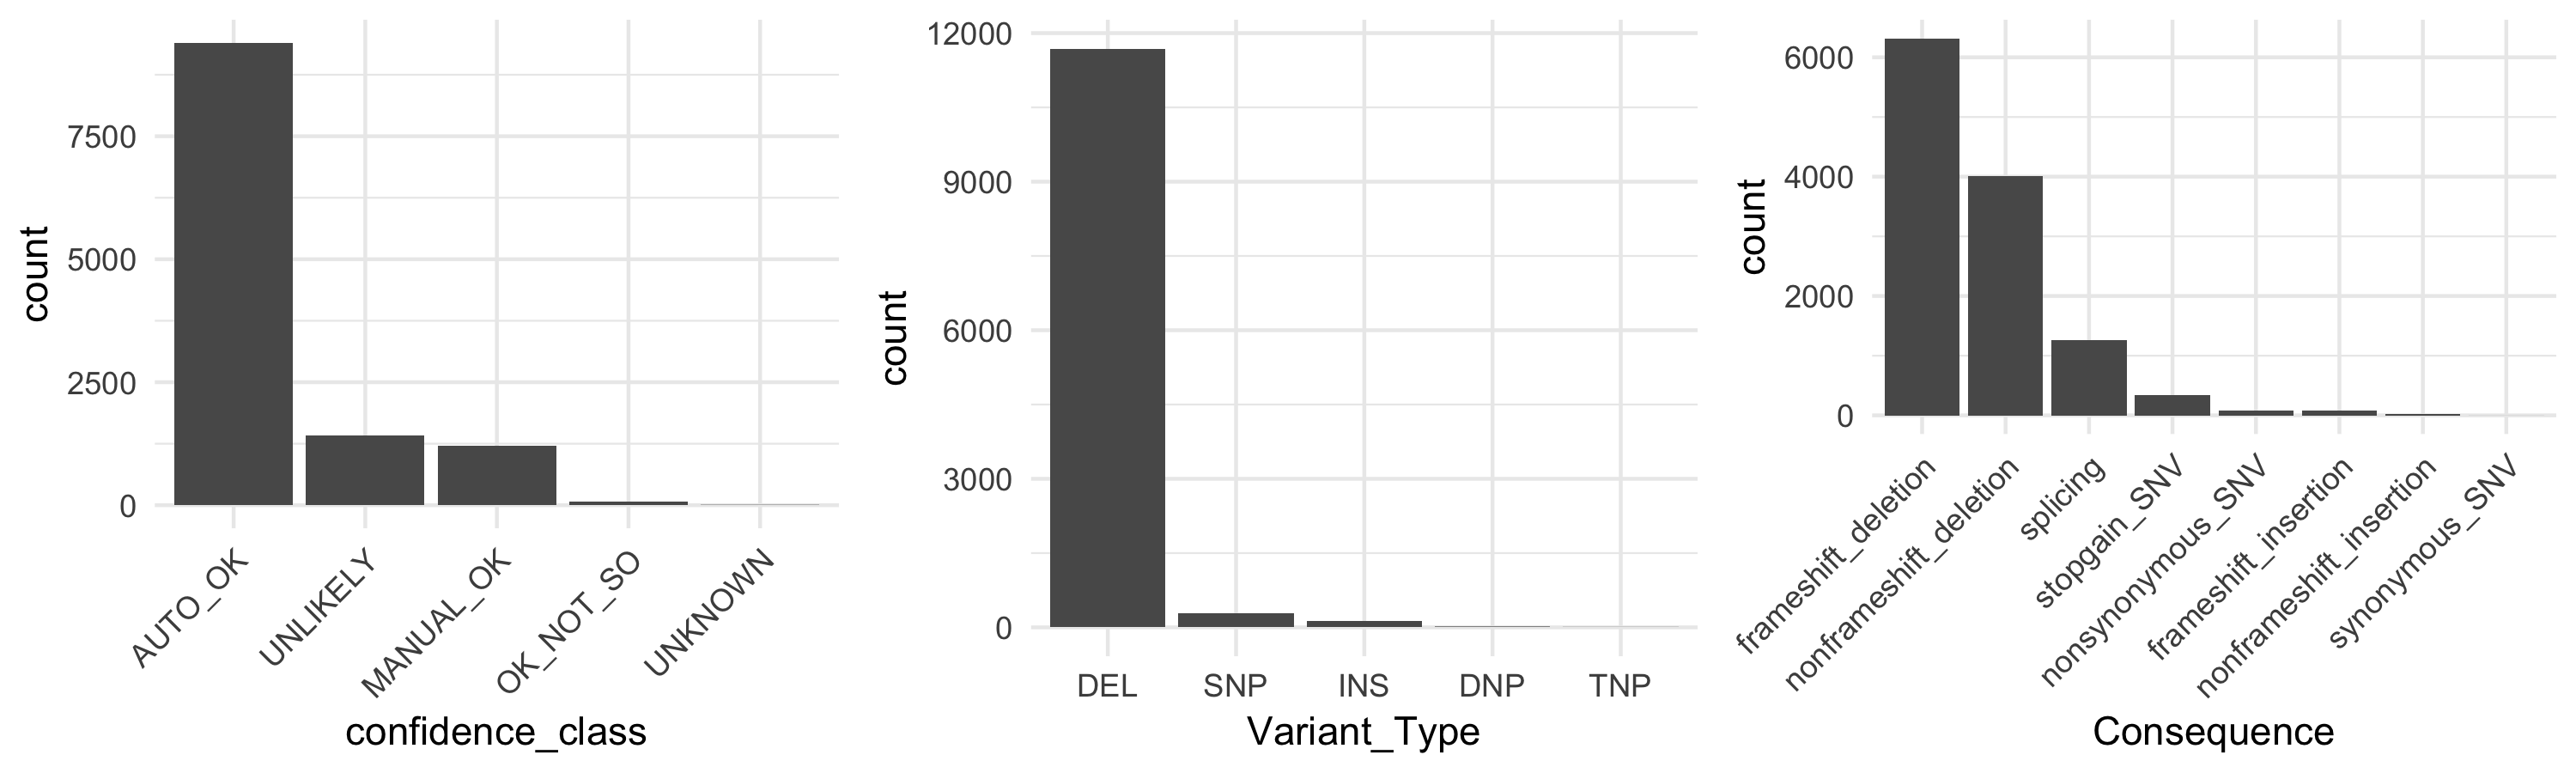

In [176]:
count_na(impact$VAG_cDNA_CHANGE)
count_na(impact$VAG_PROTEIN_CHANGE)

nrow(impact[is.na(impact$VAG_cDNA_CHANGE) & is.na(impact$VAG_PROTEIN_CHANGE),])
get_possible_correlations(get_na(impact, "VAG_cDNA_CHANGE"))

The preceding 7415 are included in these one.

In [177]:
table(impact$mut_key[is.na(impact$VAG_GENE)] %in% impact$mut_key[is.na(impact$VAG_cDNA_CHANGE)])


TRUE 
7415 

In [178]:
impact <- replace_na(impact, "VAG_GENE"          , "unknown")
impact <- replace_na(impact, "VAG_EFFECT"        , "unknown")
impact <- replace_na(impact, "VAG_RNA_CHANGE"    , "unknown")
impact <- replace_na(impact, "VAG_cDNA_CHANGE"   , "unknown")
impact <- replace_na(impact, "VAG_PROTEIN_CHANGE", "unknown")

#### VEP

In [179]:
vep_colnames

[1] "VEP_Consequence"   "VEP_BIOTYPE"       "VEP_SYMBOL"       
 [4] "VEP_EXON"          "VEP_INTRON"        "VEP_HGVSc"        
 [7] "VEP_HGVSp"         "VEP_Amino_acids"   "VEP_VARIANT_CLASS"
[10] "VEP_SIFT"          "VEP_PolyPhen"

In [180]:
count_na(impact$VEP_Consequence)
count_na(impact$VEP_VARIANT_CLASS)

[1] 0

[1] 0

In [181]:
count_na(impact$VEP_BIOTYPE)
count_na(impact$VEP_SYMBOL)
table(impact$VEP_Consequence[is.na(impact$VEP_SYMBOL)])

[1] 49

[1] 49


intergenic_variant 
                49 

In [182]:
count_na(impact$VEP_HGVSc)
get_table(impact$VEP_Consequence[is.na(impact$VEP_HGVSc)])

[1] 70

values,count,freq
intergenic_variant,49,70%
downstream_gene_variant,10,14.3%
upstream_gene_variant,6,8.6%
coding_sequence_variant&5_prime_UTR_variant,2,2.9%
splice_donor_variant&coding_sequence_variant&5_prime_UTR_variant&intron_variant,1,1.4%
splice_donor_variant&5_prime_UTR_variant&intron_variant,1,1.4%
splice_acceptor_variant&coding_sequence_variant&3_prime_UTR_variant&intron_variant,1,1.4%
-- total --,70,100%


In [183]:
count_na(impact$VEP_HGVSp)
count_na(impact$VEP_Amino_acids)

[1] 8765

[1] 8690

In [184]:
impact <- replace_na(impact, "VEP_BIOTYPE"    , "unknown")
impact <- replace_na(impact, "VEP_SYMBOL"     , "unknown")
impact <- replace_na(impact, "VEP_HGVSc"      , "unknown")
impact <- replace_na(impact, "VEP_HGVSp"      , "unknown")
impact <- replace_na(impact, "VEP_Amino_acids", "unknown")

In [185]:
count_na(impact$VEP_EXON)
count_na(impact$VEP_INTRON)

[1] 7344

[1] 239778

In [186]:
count_na(impact$VEP_SIFT)
count_na(impact$VEP_PolyPhen)

[1] 107076

[1] 106022

In [187]:
impact <- replace_na(impact, "VEP_SIFT", "unknown")
impact <- replace_na(impact, "VEP_PolyPhen", "unknown")

#### VEP gnomAD

In [188]:
vep_gnomad_colnames

[1] "VEP_gnomAD_AF"   "VEP_MAX_AF"      "VEP_MAX_AF_POPS"

In [189]:
count_na(impact$VEP_gnomAD_AF)
count_na(impact$VEP_MAX_AF)
count_na(impact$VEP_MAX_AF_POPS)

[1] 194862

[1] 199269

[1] 194346

`NA` values might correspond to not found, we replace them by a null allele frequency.

In [190]:
impact <- replace_na(impact, "VEP_gnomAD_AF"  , 0.0)
impact <- replace_na(impact, "VEP_MAX_AF"     , 0.0)
impact <- replace_na(impact, "VEP_MAX_AF_POPS", "unknown")

#### VEP COSMIC

In [191]:
vep_cosmic_colnames

[1] "VEP_COSMIC"     "VEP_COSMIC_CDS" "VEP_COSMIC_AA"  "VEP_COSMIC_CNT"

In [192]:
count_na(impact$VEP_COSMIC)
count_na(impact$VEP_COSMIC_CDS)
count_na(impact$VEP_COSMIC_AA)
count_na(impact$VEP_COSMIC_CNT)

[1] 182777

[1] 182822

[1] 182822

[1] 182822

`NA` values might correspond to not found, we replace them by a null cosmic count.

In [193]:
impact <- replace_na(impact, "VEP_COSMIC"    , "unknown")
impact <- replace_na(impact, "VEP_COSMIC_CDS", "unknown")
impact <- replace_na(impact, "VEP_COSMIC_AA" , "unknown")
impact <- replace_na(impact, "VEP_COSMIC_CNT", 0)

### Process raw features

#### `VEP_HGVSc`

In [194]:
head(impact$VEP_HGVSc)

[1] "ENST00000269305.4:c.766A>C"  "ENST00000324856.7:c.4854C>G"
[3] "ENST00000357368.4:c.1452G>C" "ENST00000262741.5:c.894C>G" 
[5] "ENST00000350721.4:c.7292G>T" "ENST00000257290.5:c.1393T>A"

In [195]:
strsplit('ENST00000269305.4:c.766A>C', ':')[[1]][2]

[1] "c.766A>C"

In [196]:
impact$VEP_HGVSc <- sapply(impact$VEP_HGVSc, function(x) strsplit(x, ':')[[1]][2])
head(impact$VEP_HGVSc)

[1] "c.766A>C"  "c.4854C>G" "c.1452G>C" "c.894C>G"  "c.7292G>T" "c.1393T>A"

#### `VEP_HGVSp`

In [197]:
head(impact$VEP_HGVSp, 20)

[1] "ENSP00000269305.4:p.Thr256Pro"  "ENSP00000320485.7:p.Pro1618%3D"
 [3] "ENSP00000349932.4:p.Leu484%3D"  "ENSP00000262741.5:p.Ile298Met" 
 [5] "ENSP00000343741.4:p.Arg2431Met" "ENSP00000257290.5:p.Leu465Met" 
 [7] "unknown"                        "ENSP00000281708.3:p.Gly61Ter"  
 [9] "ENSP00000264932.6:p.Pro482Ser"  "ENSP00000382423.3:p.Glu302Ter" 
[11] "unknown"                        "ENSP00000395929.2:p.Val1780Phe"
[13] "ENSP00000261937.6:p.Ser293Arg"  "ENSP00000262189.6:p.Lys3105Asn"
[15] "ENSP00000370593.3:p.Pro1338Thr" "ENSP00000370593.3:p.Glu915Ter" 
[17] "ENSP00000347942.3:p.Pro599Thr"  "ENSP00000382688.2:p.Asn212Ile" 
[19] "ENSP00000404845.1:p.Val1290Leu" "ENSP00000441235.2:p.Met1?"

In [198]:
get_HGVSp_from_vep <- function(HGVSp_string) {
    HGVSp_string <- strsplit(HGVSp_string, ':')[[1]][2]
    
    protein_long_name <- c('Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Glu', 'Gln', 'Gly', 'His', 'Ile', 'Leu', 'Lys',
                           'Met', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val')
    protein_short_name <- c('A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K',
                            'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V')
    
    for (name in protein_long_name)
        HGVSp_string <- gsub(name, protein_short_name[match(name, protein_long_name)], HGVSp_string)
    
    HGVSp_string <- gsub('Ter', '*', HGVSp_string)
    HGVSp_string <- gsub('%3D', '=', HGVSp_string)
    
    return (HGVSp_string)
}

get_HGVSp_from_vep('ENSP00000320485.7:p.Pro1618%3D')
get_HGVSp_from_vep('ENSP00000262741.5:p.Ile298Met')
get_HGVSp_from_vep('ENSP00000281708.3:p.Gly61Ter')

[1] "p.P1618%3D"

[1] "p.I298M"

[1] "p.G61*"

In [199]:
impact$VEP_HGVSp <- sapply(impact$VEP_HGVSp, get_HGVSp_from_vep)
head(impact$VEP_HGVSp, 20)

[1] "p.T256P"    "p.P1618%3D" "p.L484%3D"  "p.I298M"    "p.R2431M"  
 [6] "p.L465M"    NA           "p.G61*"     "p.P482S"    "p.E302*"   
[11] NA           "p.V1780F"   "p.S293R"    "p.K3105N"   "p.P1338T"  
[16] "p.E915*"    "p.P599T"    "p.N212I"    "p.V1290L"   "p.M1?"

#### `VEP_SIFT`

In [200]:
head(unique(impact$VEP_SIFT), 20)

[1] "deleterious(0)"                   "unknown"                         
 [3] "deleterious(0.01)"                "tolerated_low_confidence(0.12)"  
 [5] "tolerated(0.4)"                   "tolerated(0.17)"                 
 [7] "deleterious(0.02)"                "deleterious_low_confidence(0)"   
 [9] "tolerated_low_confidence(0.1)"    "tolerated(0.08)"                 
[11] "deleterious(0.03)"                "deleterious_low_confidence(0.03)"
[13] "tolerated(1)"                     "tolerated(0.25)"                 
[15] "tolerated(0.33)"                  "tolerated(0.05)"                 
[17] "tolerated(0.48)"                  "tolerated(0.21)"                 
[19] "deleterious_low_confidence(0.01)" "tolerated(0.19)"

In [201]:
get_SIFT_from_vep <- function(SIFT_string) {
    SIFT_string <- strsplit(SIFT_string, '\\(')[[1]]
    SIFT_info <- SIFT_string[1]
    
    return (HGVSp_string)
}

In [202]:
strsplit('deleterious(0)', '\\(')[[1]][1]

[1] "deleterious"

In [203]:
impact$VEP_SIFT_class <- sapply(impact$VEP_SIFT, function(x) strsplit(x, '\\(')[[1]][1])
head(unique(impact$VEP_SIFT_class))

[1] "deleterious"                "unknown"                   
[3] "tolerated_low_confidence"   "tolerated"                 
[5] "deleterious_low_confidence"

In [204]:
as.integer(gsub(')', '', strsplit("tolerated(0.25)", '\\(')[[1]][2]))
as.integer(gsub(')', '', strsplit("unknown", '\\(')[[1]][2]))

[1] 0

[1] NA

In [205]:
impact$VEP_SIFT_score <- sapply(impact$VEP_SIFT,
                                function(x) as.integer(gsub(')', '', strsplit(x, '\\(')[[1]][2])))
head(unique(impact$VEP_SIFT_score))

[1]  0 NA  1

In [206]:
impact$VEP_SIFT <- NULL

#### `VEP_PolyPhen`

In [207]:
head(unique(impact$VEP_PolyPhen), 20)

[1] "probably_damaging(0.999)" "unknown"                 
 [3] "benign(0.277)"            "probably_damaging(0.997)"
 [5] "probably_damaging(0.965)" "benign(0.005)"           
 [7] "probably_damaging(0.952)" "possibly_damaging(0.738)"
 [9] "probably_damaging(0.995)" "possibly_damaging(0.472)"
[11] "benign(0)"                "benign(0.374)"           
[13] "benign(0.035)"            "probably_damaging(1)"    
[15] "possibly_damaging(0.485)" "probably_damaging(0.986)"
[17] "possibly_damaging(0.451)" "probably_damaging(0.985)"
[19] "possibly_damaging(0.578)" "probably_damaging(0.994)"

In [208]:
impact$VEP_PolyPhen_class <- sapply(impact$VEP_PolyPhen, function(x) strsplit(x, '\\(')[[1]][1])
head(unique(impact$VEP_PolyPhen_class))

[1] "probably_damaging" "unknown"           "benign"           
[4] "possibly_damaging"

In [209]:
impact$VEP_PolyPhen_score <- sapply(impact$VEP_PolyPhen,
                                    function(x) as.integer(gsub(')', '', strsplit(x, '\\(')[[1]][2])))
head(unique(impact$VEP_PolyPhen_score))

[1]  0 NA  1

In [210]:
impact$VEP_PolyPhen <- NULL

#### `VEP_COSMIC_CNT`

In [211]:
head(unique(impact$VEP_COSMIC_CNT), 20)

[1] "1"                       "0"                      
 [3] "1&1&1&1&1&1"             "1&1&1"                  
 [5] "1&1"                     "53"                     
 [7] "158"                     "19&21&14"               
 [9] "229&230&200&230&179&789" "42&170"                 
[11] "2"                       "44"                     
[13] "90&90&413&65&77"         "2&2"                    
[15] "3"                       "32&27&56&25"            
[17] "239&261&766&221"         "14&46"                  
[19] "4&4"                     "60&3"

In [212]:
get_cosmic_count_from_vep <- function(cosmic_string) {
    return (sum(as.integer(strsplit(cosmic_string, '&')[[1]]))) 
}

get_cosmic_count_from_vep("1&1&1&1&1&1")
get_cosmic_count_from_vep("15&15&50&5&15&15")

[1] 6

[1] 115

In [213]:
impact$VEP_COSMIC_CNT <- sapply(impact$VEP_COSMIC_CNT, get_cosmic_count_from_vep)
head(unique(impact$VEP_COSMIC_CNT), 20)

[1]    1    0    6    3    2   53  158   54 1857  212   44  735    4  140 1487
[16]   60    8   63 2139  275

## IMPACT annotations vs VAGrENT annotations vs VEP annotations

In [214]:
vag_colnames
vep_colnames

[1] "VAG_VT"             "VAG_GENE"           "VAG_RNA_CHANGE"    
[4] "VAG_cDNA_CHANGE"    "VAG_PROTEIN_CHANGE" "VAG_EFFECT"

[1] "VEP_Consequence"   "VEP_BIOTYPE"       "VEP_SYMBOL"       
 [4] "VEP_EXON"          "VEP_INTRON"        "VEP_HGVSc"        
 [7] "VEP_HGVSp"         "VEP_Amino_acids"   "VEP_VARIANT_CLASS"
[10] "VEP_SIFT"          "VEP_PolyPhen"

### `Variant_Type` vs `VAG_VT` vs `VEP_VARIANT_CLASS`

     
      Complex    Del    Ins    Sub
  DEL     615  22812      0      0
  DNP    2872      0      0      0
  INS     132      0   7707      0
  SNP      86      0      0 213880
  TNP     189      0      0      0

     
      deletion  indel insertion    SNV substitution
  DEL    22393   1013         0      0           21
  DNP        0      0         0      0         2872
  INS        0    153      7662      0           24
  SNP        0      0         0 213880           86
  TNP        0      0         0      0          189

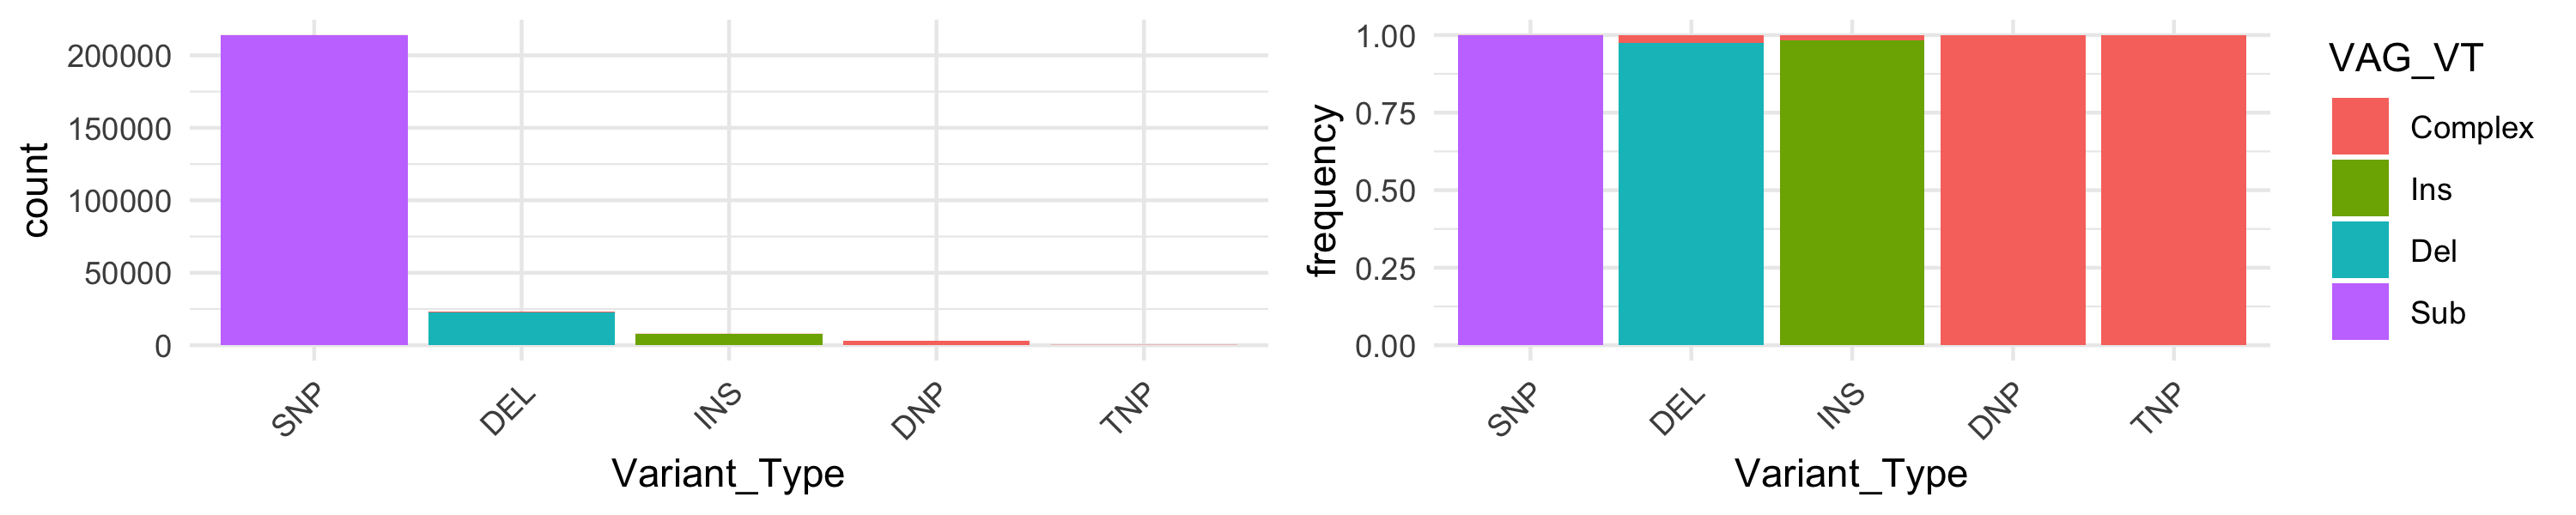

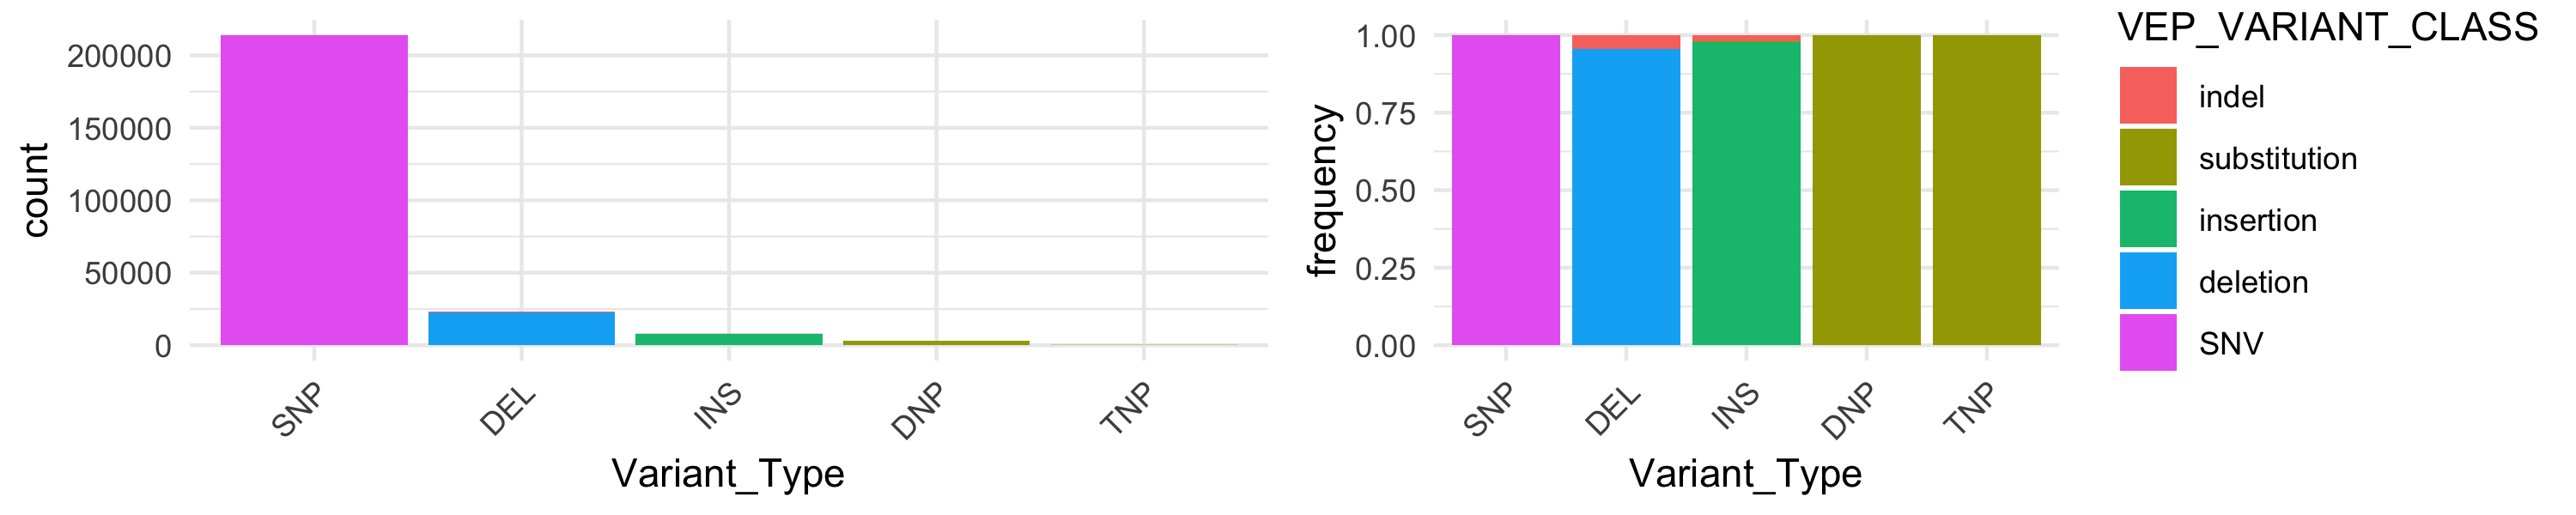

In [215]:
table(impact$Variant_Type, impact$VAG_VT)
table(impact$Variant_Type, impact$VEP_VARIANT_CLASS)


plot_contingency_table_as_histograms(impact, "Variant_Type", "VAG_VT", height = 2)
plot_contingency_table_as_histograms(impact, "Variant_Type", "VEP_VARIANT_CLASS", height = 2)

### `Consequence` vs `VAG_EFFECT` vs `VEP_Consequence`

In [216]:
get_table(impact$Consequence)
get_table(impact$VAG_EFFECT) %>% filter(count >= 500)
get_table(impact$VEP_Consequence) %>% filter(count >= 500)

values,count,freq
nonsynonymous_SNV,142688,57.5%
synonymous_SNV,50005,20.1%
stopgain_SNV,18769,7.6%
frameshift_deletion,16737,6.7%
splicing,8457,3.4%
frameshift_insertion,6423,2.6%
nonframeshift_deletion,4293,1.7%
nonframeshift_insertion,921,0.4%
-- total --,248293,100%


values,count,freq
non_synonymous_codon,142069,57.2%
synonymous_codon,50400,20.3%
stop_gained,17875,7.2%
frameshift_variant,17403,7%
unknown,7415,3%
splice_site_variant,5646,2.3%
intron_variant,1587,0.6%
5KB_downstream_variant,1476,0.6%
extended_intronic_splice_region_variant,979,0.4%
inframe_codon_gain,872,0.4%


values,count,freq
missense_variant,138178,55.7%
synonymous_variant,47768,19.2%
frameshift_variant,22627,9.1%
stop_gained,17386,7%
missense_variant&splice_region_variant,4320,1.7%
inframe_deletion,3575,1.4%
splice_acceptor_variant,3097,1.2%
splice_donor_variant,2506,1%
splice_region_variant&synonymous_variant,1241,0.5%
splice_region_variant&intron_variant,1127,0.5%


### `Hugo_Symbol` vs `VAG_GENE` vs `VEP_SYMBOL`

In [217]:
compare_features <- function(data, feature_1_name, feature_2_name, feature_3_name) {
    dd <- data[data[,feature_1_name] != data[,feature_2_name] |
               data[,feature_1_name] != data[,feature_3_name] |
               data[,feature_2_name] != data[,feature_3_name], c(feature_1_name, feature_2_name, feature_3_name)]
    print(print_count_and_proportion(nrow(dd), nrow(data)))
    print(print_count_and_proportion(nrow(unique(dd)),
                                     nrow(unique(data[,c(feature_1_name, feature_2_name, feature_3_name)]))))

    rownames(dd) <- NULL
    return(unique(dd))
}

In [230]:
dd <- compare_features(impact, "Hugo_Symbol", "VAG_GENE", "VEP_SYMBOL")
dd <- dd[order(dd$Hugo_Symbol),]
head(unique(dd), 200)

[1] "12054 over 248293 (4.85%)"
[1] "710 over 1172 (60.58%)"


,Hugo_Symbol,VAG_GENE,VEP_SYMBOL
902,ABL1,unknown,ABL1
56,ABRAXAS1,FAM175A,FAM175A
342,ABRAXAS1,unknown,FAM175A
3812,ABRAXAS1,MRPS18C,FAM175A
6463,AGO2,unknown,AGO2
6669,AKT1,unknown,AKT1
1266,AKT2,unknown,AKT2
2050,AKT3,unknown,AKT3
5650,ALK,unknown,ALK
2344,ALOX12B,AC129492.6,AC129492.6


### `cDNA_change`, `VAG_cDNA_CHANGE`, `VEP_HGVSc`

In [219]:
head(compare_features(impact, "cDNA_change", "VAG_cDNA_CHANGE", "VEP_HGVSc"))

[1] "46992 over 248293 (18.93%)"
[1] "31563 over 83695 (37.71%)"


cDNA_change,VAG_cDNA_CHANGE,VEP_HGVSc
c.894C>G,c.1032C>G,c.894C>G
c.3868G>T,c.3991G>T,c.3868G>T
c.3157-1G>C,c.3157-1G>C,c.3100-1G>C
c.2906G>T,c.2906G>T,c.2849G>T
c.1641delG,c.1640delG,c.1641del
c.1087delG,c.1087+1delg,c.1087+1del


### `HGVSp_Short`, `VAG_PROTEIN_CHANGE`, `VEP_HGVSp`

In [224]:
head(compare_features(impact, "HGVSp_Short", "VAG_PROTEIN_CHANGE", "VEP_HGVSp"), 200)

[1] "97660 over 248293 (39.33%)"
[1] "48697 over 119716 (40.68%)"


,HGVSp_Short,VAG_PROTEIN_CHANGE,VEP_HGVSp
1,p.P1618P,p.P1618P,p.P1618=
2,p.L484L,p.L484L,p.L484=
3,p.I298M,p.I344M,p.I298M
4,,p.?,NA
6,p.V1290L,p.V1331L,p.V1290L
7,p.M1L,p.M1L,p.M1?
9,p.G969V,p.G969V,p.G950V
10,p.W547fs,p.W547fs*35,p.W547Cfs*35
11,p.A363fs,p.?,NA
12,p.P67fs,p.P67fs*56,p.P67Qfs*56


### `VAG_RNA_CHANGE`

In [143]:
head(impact$VAG_RNA_CHANGE, 20)

[1] "r.956a>c"    "r.5225c>g"   "r.1686g>c"   "r.1049c>g"   "r.7414g>u"  
 [6] "r.1724u>a"   "r.2467-1g>u" "r.1411g>u"   "r.1559c>u"   "r.904g>u"   
[11] "r.2087+2u>g" "r.5383g>u"   "r.958c>a"    "r.9534a>u"   "r.4556c>a"  
[16] "r.3287g>u"   "r.2027c>a"   "r.998a>u"    "r.4029g>u"   "r.323a>u"

## Other VEP annotations

In [68]:
vep_colnames

[1] "VEP_Consequence"   "VEP_BIOTYPE"       "VEP_SYMBOL"       
 [4] "VEP_EXON"          "VEP_INTRON"        "VEP_HGVSc"        
 [7] "VEP_HGVSp"         "VEP_Amino_acids"   "VEP_VARIANT_CLASS"
[10] "VEP_SIFT"          "VEP_PolyPhen"

### `VEP_BIOTYPE`

In [69]:
get_table(impact$VEP_BIOTYPE)

values,count,freq
protein_coding,247680,99.8%
nonsense_mediated_decay,493,0.2%
unknown,49,0%
antisense,25,0%
processed_transcript,16,0%
retained_intron,15,0%
lincRNA,10,0%
unprocessed_pseudogene,1,0%
transcribed_unprocessed_pseudogene,1,0%
pseudogene,1,0%


In [70]:
vep_colnames <- c("VEP_Consequence", "VEP_BIOTYPE", "VEP_SYMBOL", "VEP_EXON", "VEP_INTRON", "VEP_HGVSc",
                  "VEP_HGVSp", "VEP_Amino_acids", "VEP_Codons", "VEP_VARIANT_CLASS", "VEP_SIFT", "VEP_PolyPhen")

### VEP gnomAD annotations

In [71]:
vep_gnomad_colnames

[1] "VEP_gnomAD_AF"   "VEP_MAX_AF"      "VEP_MAX_AF_POPS"

#### `VEP_gnomAD_AF` vs `Kaviar_AF`

In [72]:
summary(impact$VEP_gnomAD_AF)
impact$VEP_gnomAD_AF[is.na(impact$VEP_gnomAD_AF)] <- 0.0
summary(impact$VEP_gnomAD_AF)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0000000 0.0000000 0.0003502 0.0000000 0.6610000 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0000000 0.0000000 0.0003502 0.0000000 0.6610000 

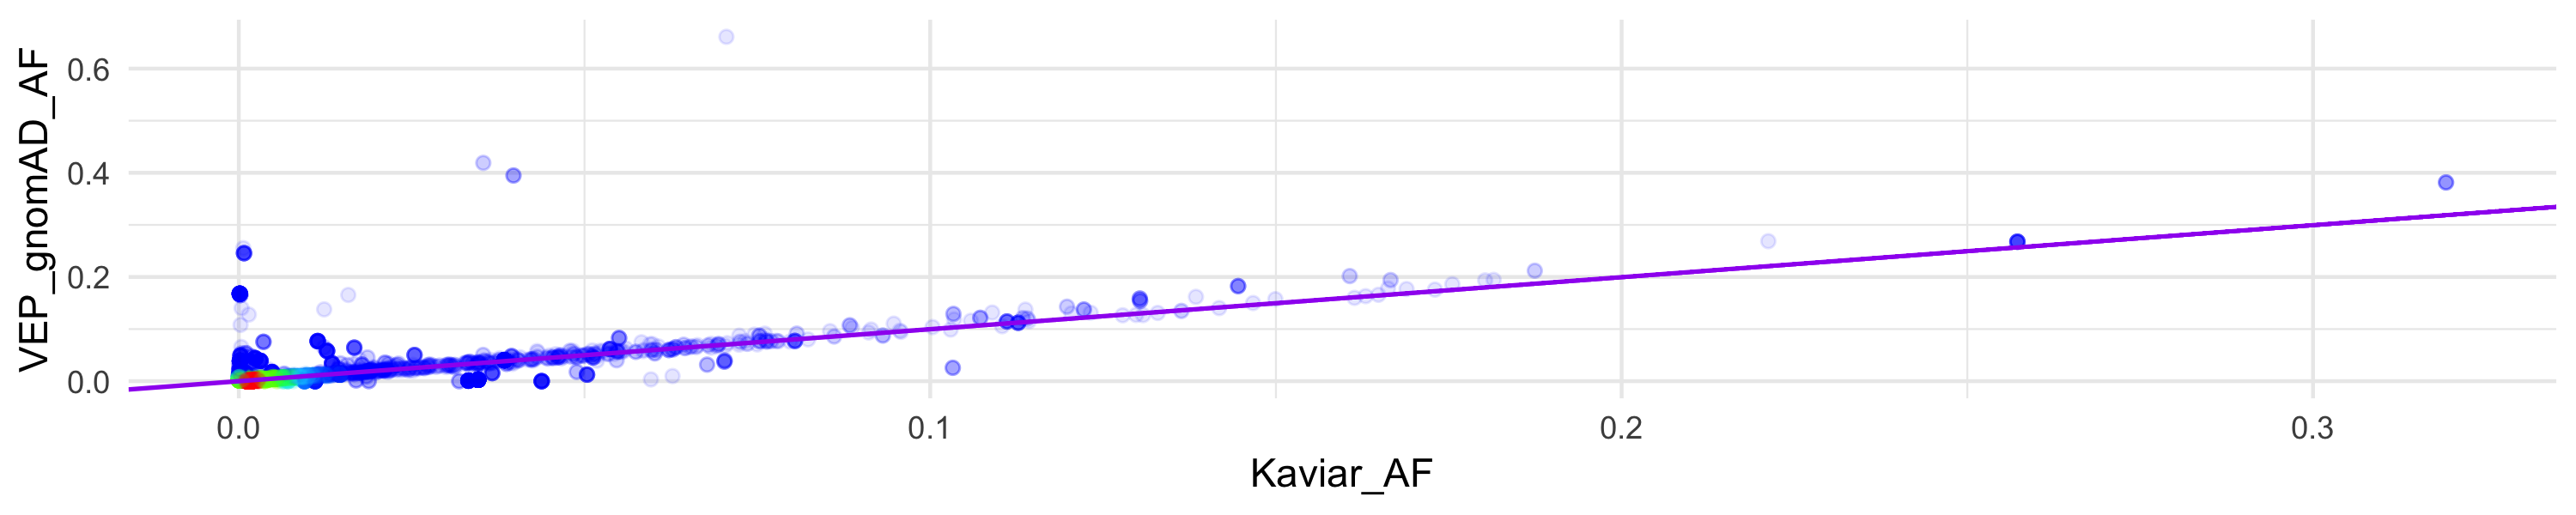

In [73]:
plot_density_2d(impact[impact$Kaviar_AF > 0.001 | impact$VEP_gnomAD_AF > 0.001,],
                "Kaviar_AF", "VEP_gnomAD_AF", points_only = TRUE) + 
    geom_abline(intercept = 0, slope = 1, color ="purple", size = 0.6)

In [74]:
nrow(impact[abs(impact$Kaviar_AF - impact$VEP_gnomAD_AF) >= 0.1,])
get_table(impact$Hugo_Symbol[abs(impact$Kaviar_AF - impact$VEP_gnomAD_AF) >= 0.1])

[1] 71

values,count,freq
LATS2,40,56.3%
NCOR1,12,16.9%
HLA-B,12,16.9%
HLA-A,4,5.6%
KMT2C,2,2.8%
TET1,1,1.4%
-- total --,71,100%


#### `VEP_MAX_AF` and `VEP_MAX_AF_POPS`

### VEP COSMIC annotations

In [75]:
vep_cosmic_colnames

[1] "VEP_COSMIC"     "VEP_COSMIC_CDS" "VEP_COSMIC_AA"  "VEP_COSMIC_CNT"

#### `VEP_COSMIC_CNT` vs `cosmic_count`

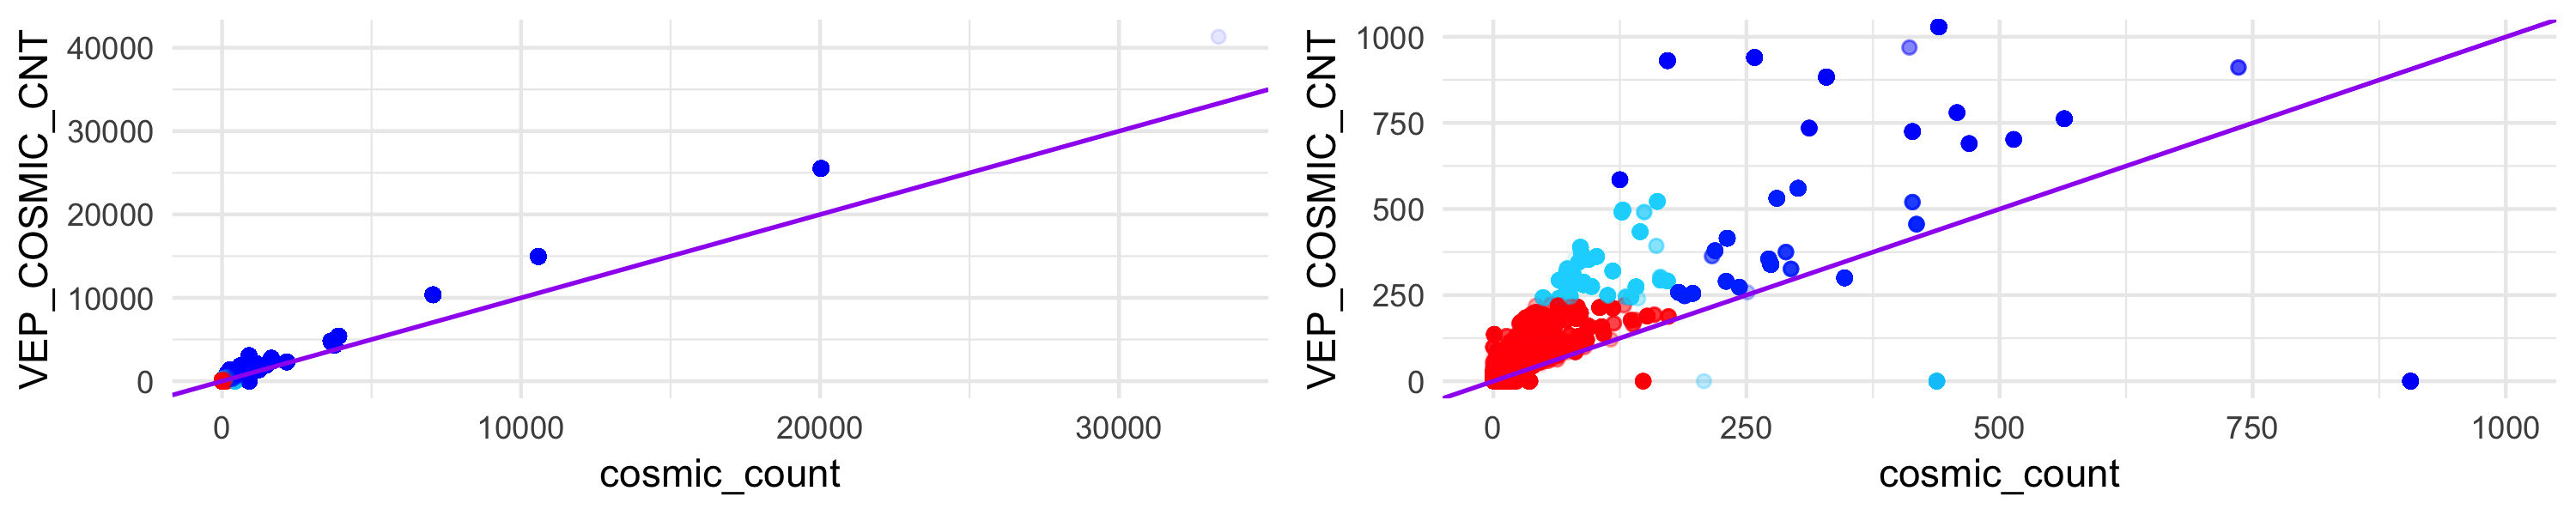

In [76]:
plot1 <- plot_density_2d(impact[impact$cosmic_count > 0 | impact$VEP_COSMIC_CNT > 0,],
                "cosmic_count", "VEP_COSMIC_CNT", points_only = TRUE) + 
    geom_abline(intercept = 0, slope = 1, color ="purple", size = 0.6)
plot2 <- plot1 + coord_cartesian(xlim = c(0:1000), ylim = c(0:1000))

plot_side_by_side(plot1, plot2)

[1] 1635

[1] "Number of different genes:  166"


[1] 1503

[1] "Number of different genes:  29"


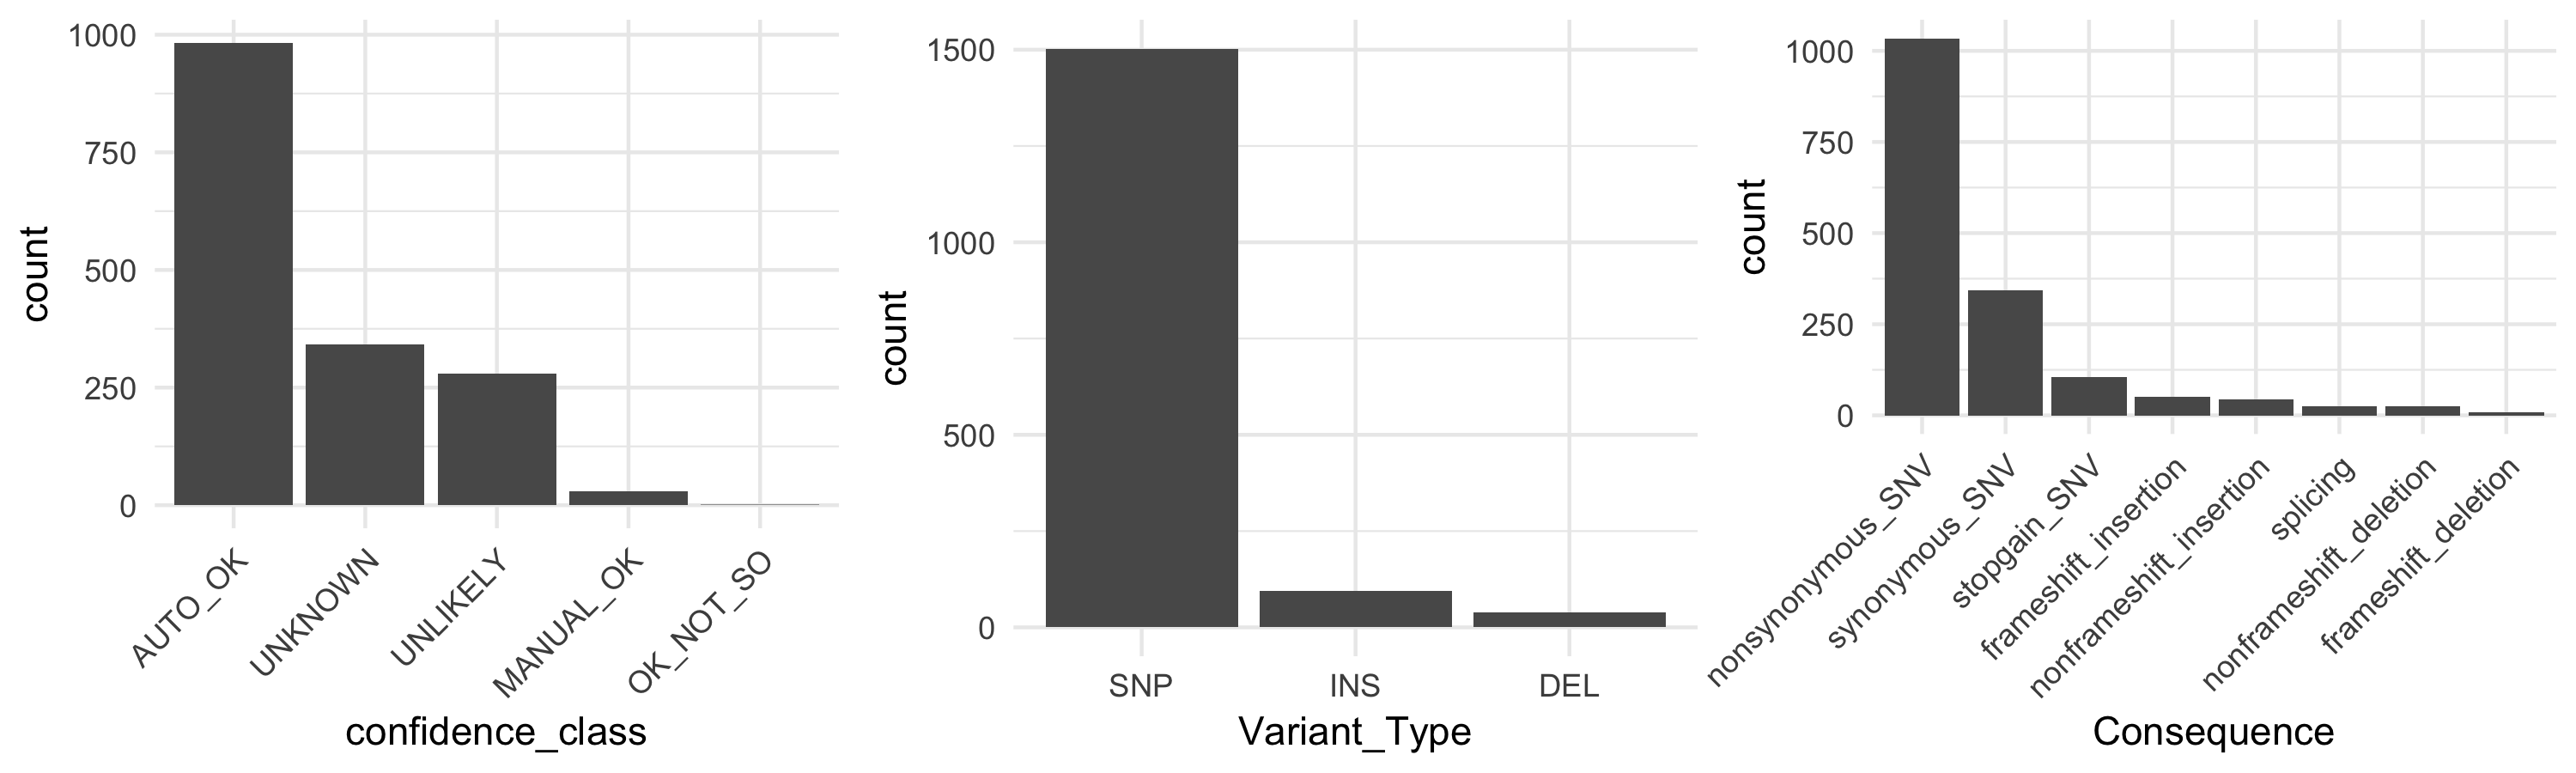

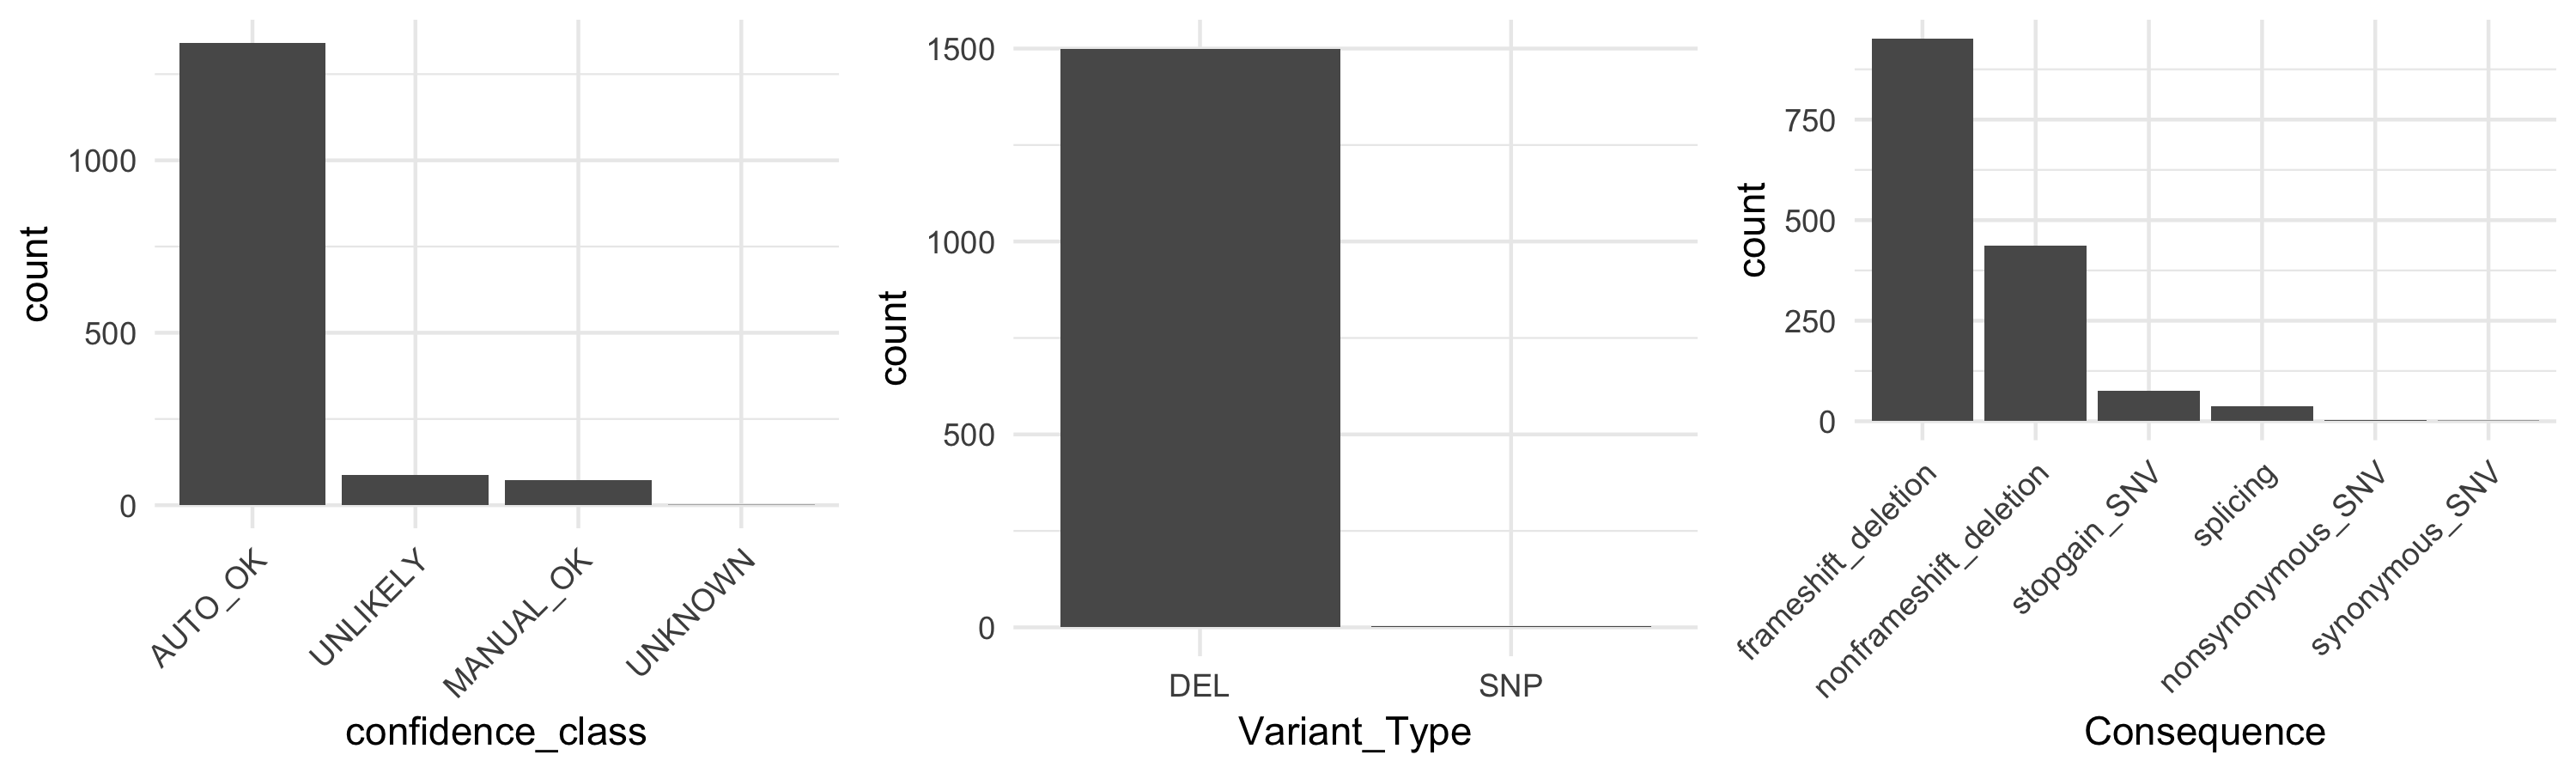

In [77]:
nrow(impact[impact$cosmic_count == 0 & impact$VEP_COSMIC_CNT > 5,])
get_possible_correlations(impact[impact$cosmic_count == 0 & impact$VEP_COSMIC_CNT > 5,])

nrow(impact[impact$cosmic_count > 5  & impact$VEP_COSMIC_CNT == 0,])
get_possible_correlations(impact[impact$cosmic_count > 5  & impact$VEP_COSMIC_CNT == 0,])

### VEP SIFT and PolyPhen annotations

In [99]:
get_table(impact$VEP_SIFT_class)
get_table(impact$VEP_PolyPhen_class)

values,count,freq
unknown,107076,43.1%
deleterious,81511,32.8%
tolerated,44401,17.9%
deleterious_low_confidence,8663,3.5%
tolerated_low_confidence,6642,2.7%
-- total --,248293,100%


values,count,freq
unknown,106329,42.8%
probably_damaging,61208,24.7%
benign,56240,22.7%
possibly_damaging,24516,9.9%
-- total --,248293,100%


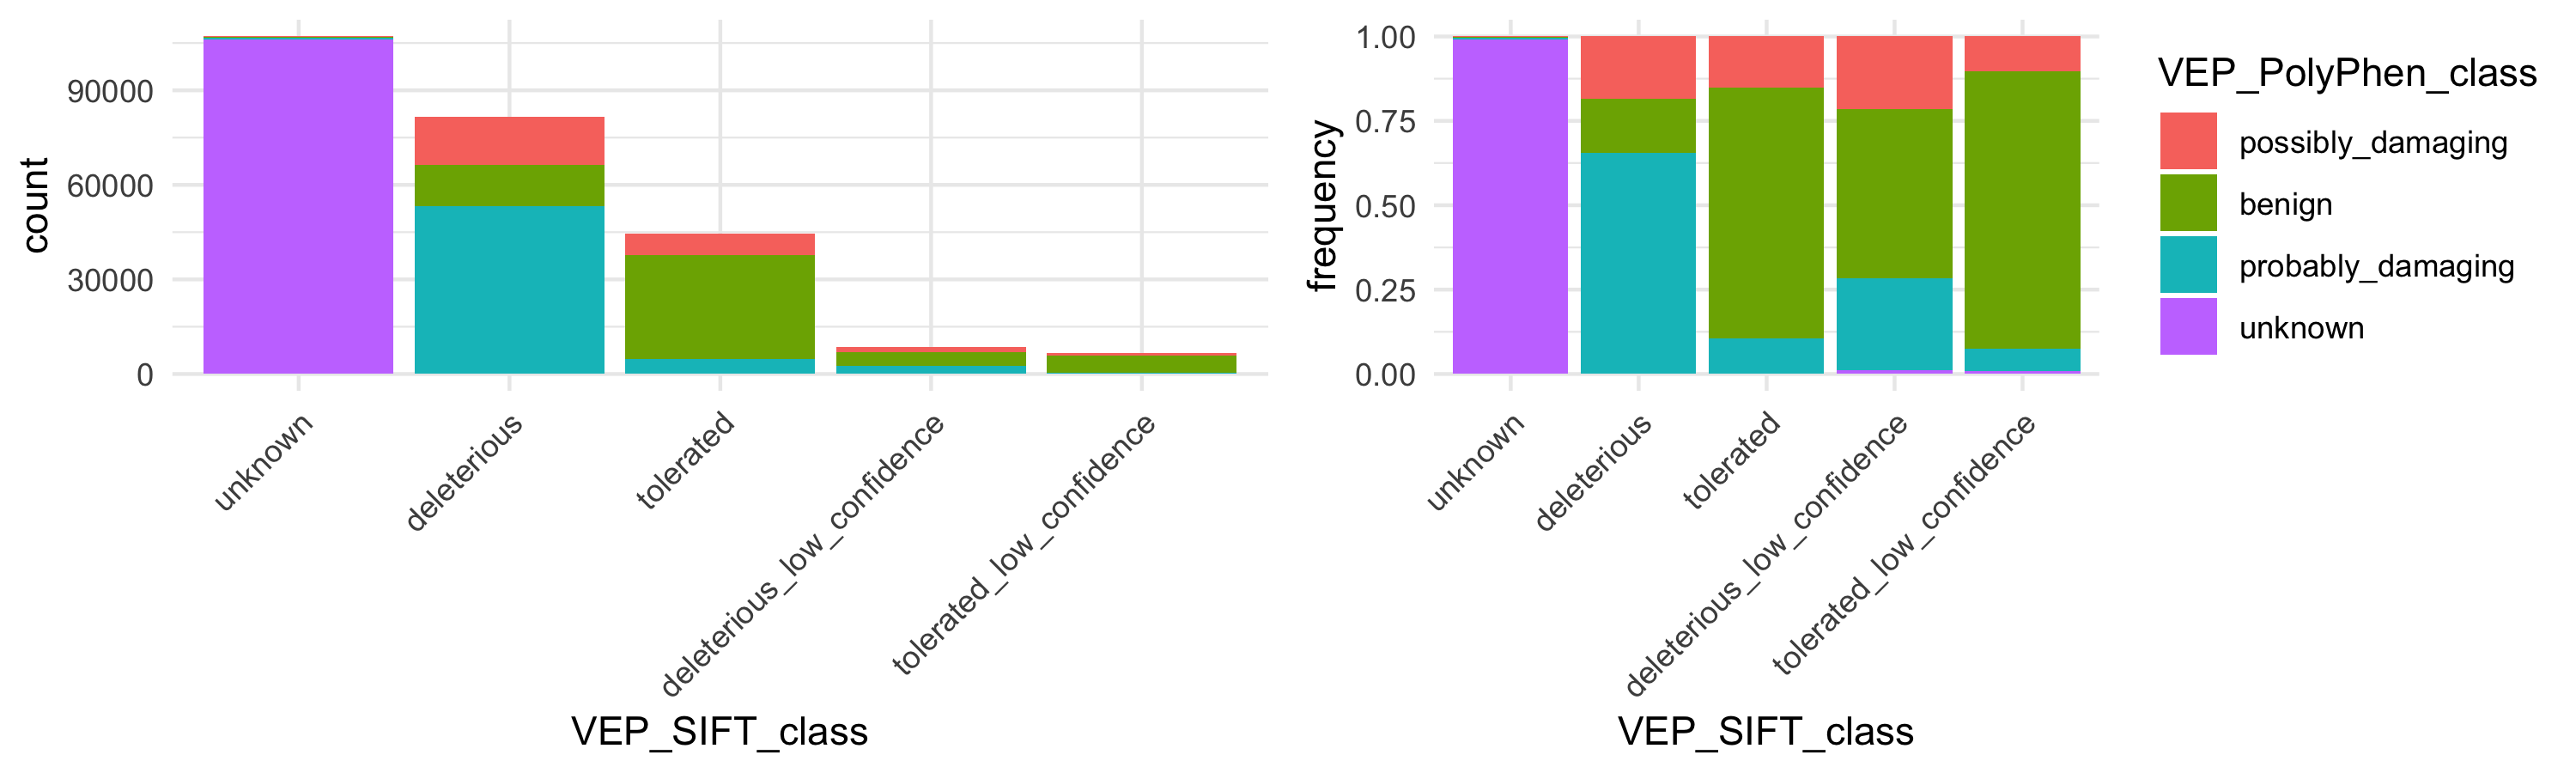

In [94]:
plot_contingency_table_as_histograms(impact, "VEP_SIFT_class", "VEP_PolyPhen_class")

Warning message:
“Removed 107076 rows containing non-finite values (stat_density).”

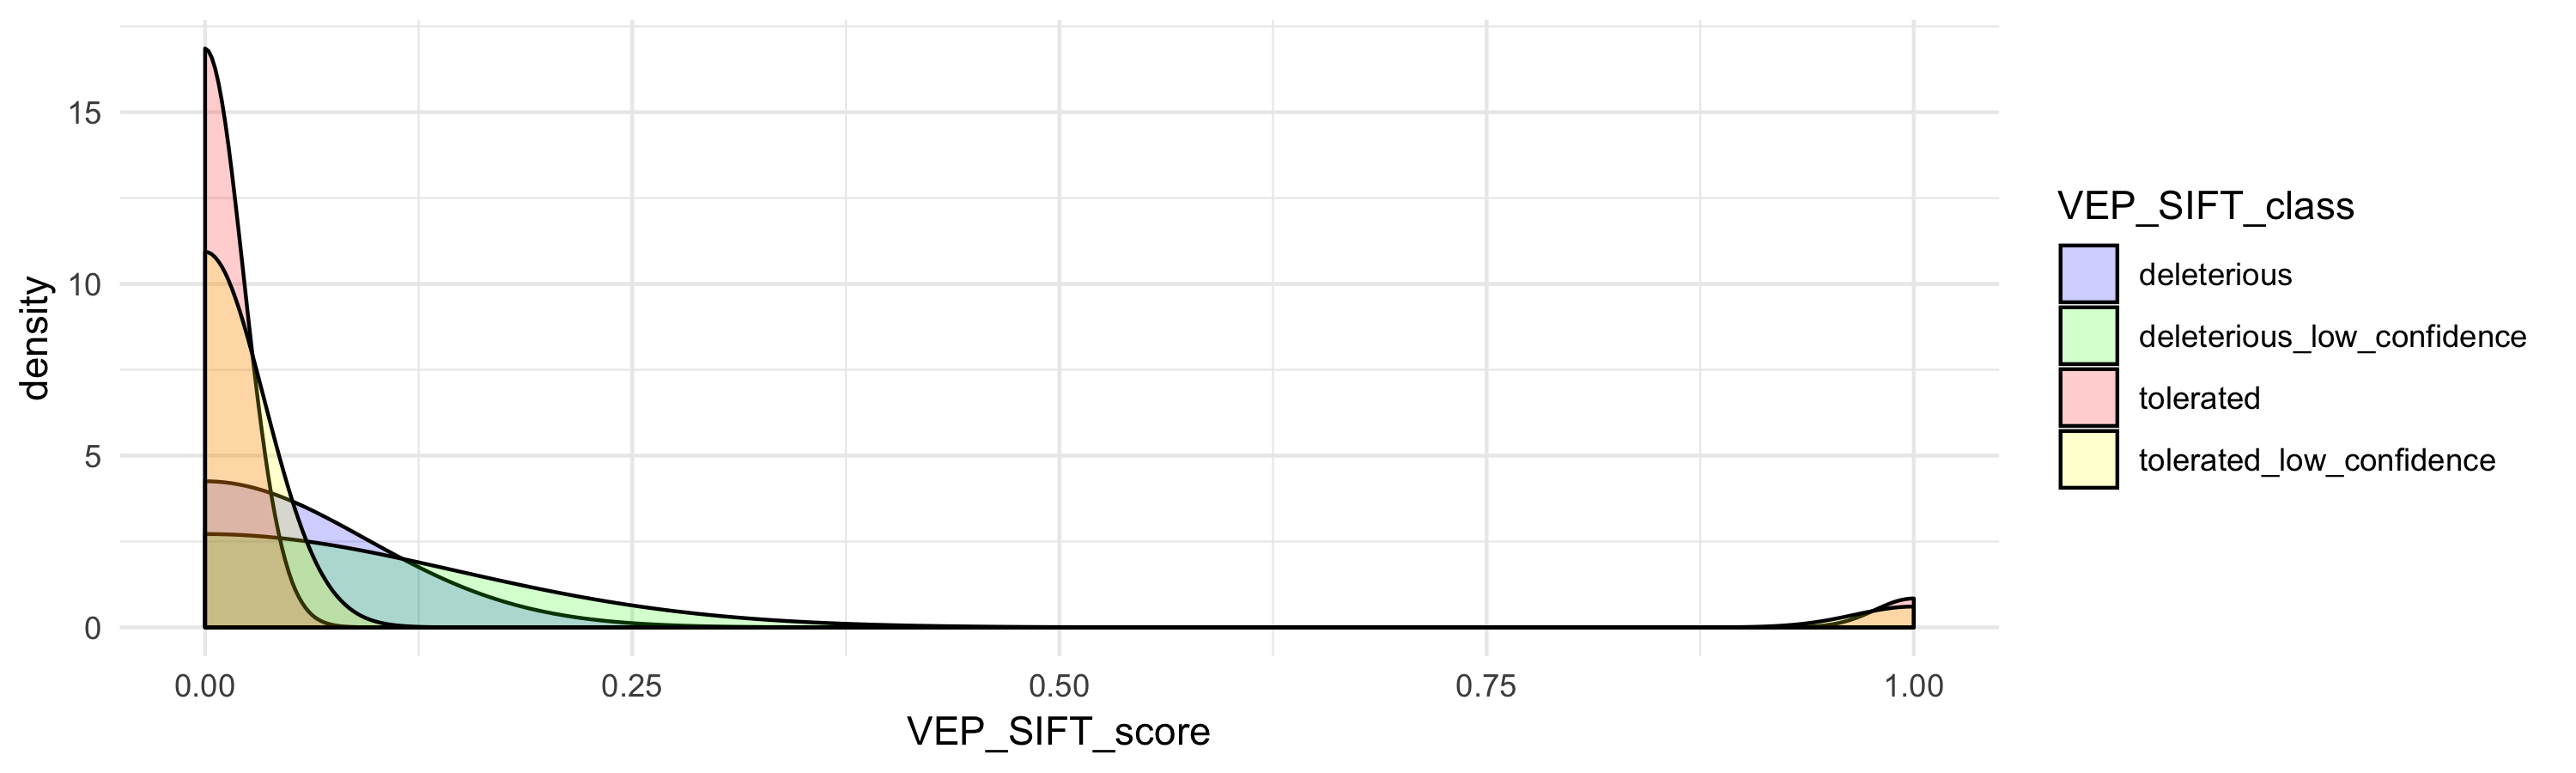

In [125]:
plot_density(impact, "VEP_SIFT_score", fill = "VEP_SIFT_class")

Warning message:
“Removed 106022 rows containing non-finite values (stat_density).”

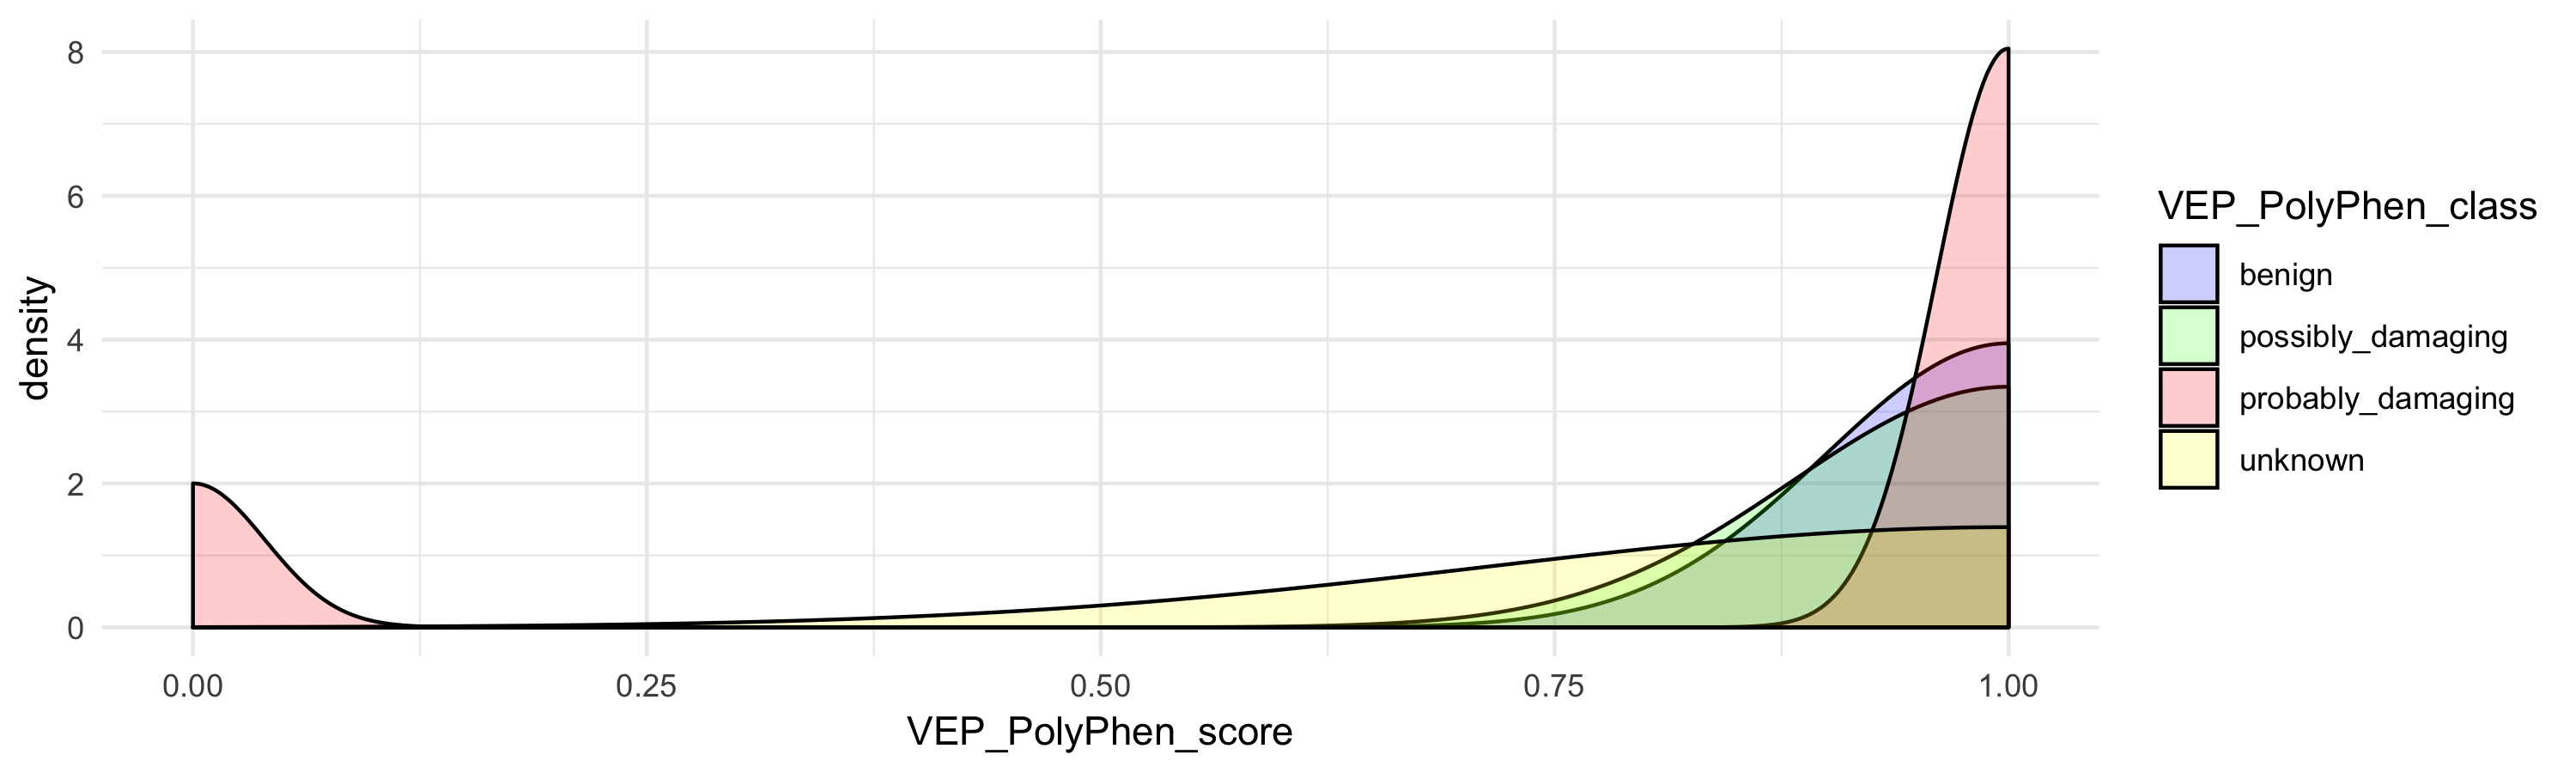

In [126]:
plot_density(impact, "VEP_PolyPhen_score", fill = "VEP_PolyPhen_class")

In [140]:
impact$VEP_PolyPhen_score <- 1 - impact$VEP_PolyPhen_score